In [38]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [39]:
!pip install -U pandas-datareader

In [40]:
import pandas as pd
import pandas_datareader as pdr

In [41]:
company_df = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download', header=0)[0]

In [42]:
company_df

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,AJ네트웍스,95570,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,손삼달,http://www.ajnet.co.kr,서울특별시
1,BNK금융지주,138930,기타 금융업,금융지주회사,2011-03-30,12월,빈대인,http://www.bnkfg.com,부산광역시
2,DSR,155660,1차 비철금속 제조업,합섬섬유로프,2013-05-15,12월,홍석빈,http://www.dsr.com,부산광역시
3,GS,78930,기타 금융업,지주회사/부동산 임대,2004-08-05,12월,"허태수, 홍순기 (각자 대표이사)",NaN,서울특별시
4,HDC현대산업개발,294870,건물 건설업,"외주주택, 자체공사, 일반건축, 토목 등",2018-06-12,12월,"최익훈, 정익희, 김회언 (각자 대표이사)",http://www.hdc-dvp.com,서울특별시
...,...,...,...,...,...,...,...,...,...
2629,카이바이오텍,446600,의약품 제조업,방사성 진단 및 치료 의약품,2022-12-23,12월,김영덕,http://www.kaibiotech.com/,전라북도
2630,코스텍시스템,169670,특수 목적용 기계 제조업,"반도체 웨이퍼 이송장비, 본딩장비",2022-01-21,12월,배준호,http://www.kosteks.com/,경기도
2631,타임기술,318660,소프트웨어 개발 및 공급업,"ILS(종합군수지원), IETM(전자식기술교범), CBT(전자식교보재), 기술번역",2021-06-24,12월,주양효,http://timett.co.kr,경상남도
2632,테크엔,308700,전구 및 조명장치 제조업,LED조명장치,2018-12-21,12월,"이지원,박철(각자 대표이사)",http://www.techen.co.kr,대구광역시


In [133]:
company_df[company_df['회사명'].str.contains('에코프로')]

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
226,에코프로,86520,기타 금융업,"환경소재,화학필터,이차전지소재등",2007-07-20,12월,송호준,http://www.ecopro.co.kr,충청북도
2515,에코프로비엠,247540,일차전지 및 축전지 제조업,양극활물질,2019-03-05,12월,"각자 대표이사 주재환, 최문호",http://www.ecoprobm.co.kr,충청북도
2516,에코프로에이치엔,383310,기타 화학제품 제조업,환경오염 방지 관련 소재 및 설비,2021-05-28,12월,김종섭,http://www.ecoprohn.co.kr,충청북도


In [134]:
df = pdr.DataReader('247540', 'naver', start='2023-01-01', end='2023-09-08')
df

,Open,High,Low,Close,Volume
Date,,,,,
2023-01-02,93100,96200,93100,93400,710596
2023-01-03,93400,94300,91600,93200,470258
2023-01-04,91000,94400,90100,94300,463744
2023-01-05,95100,96200,92500,92700,441784
2023-01-06,92000,94700,91100,94700,447567
...,...,...,...,...,...
2023-09-04,303000,312500,302500,307500,719380
2023-09-05,307500,310000,299500,306500,801440
2023-09-06,312000,314500,300500,301000,648114


In [135]:
df.to_csv('kakao.csv')

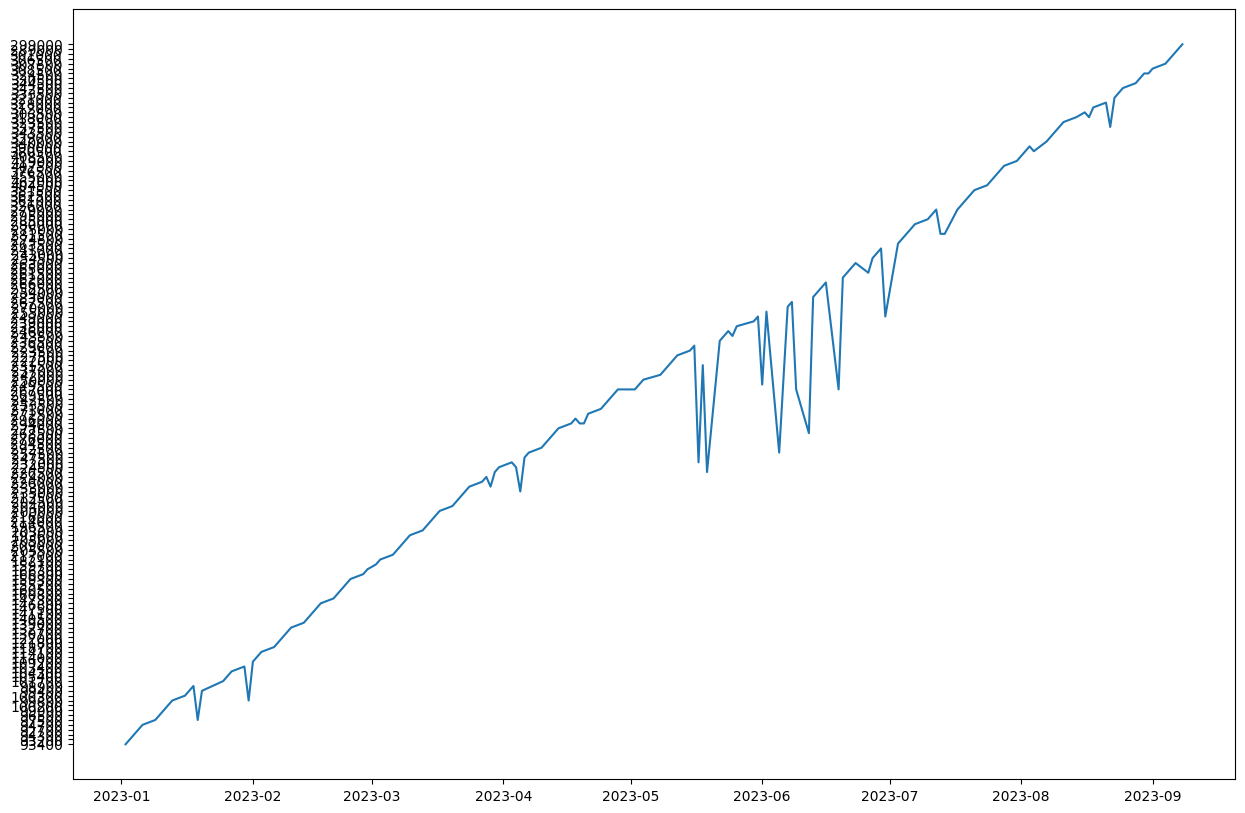

In [136]:
plt.figure(figsize=(15, 10))
plt.plot(df['Close'])

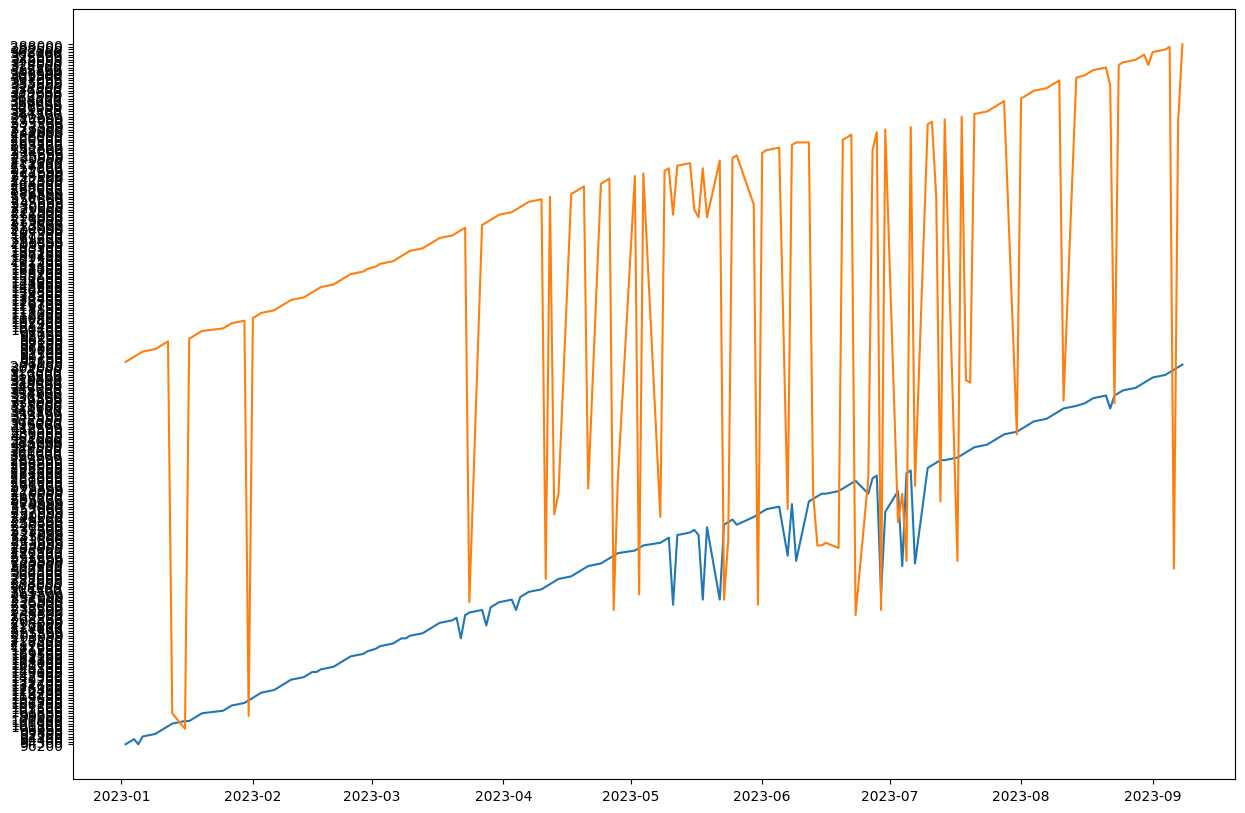

In [137]:
plt.figure(figsize=(15, 10))
plt.plot(df['High'])
plt.plot(df['Low'])

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 172 entries, 2023-01-02 to 2023-09-08
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Open    172 non-null    object
 1   High    172 non-null    object
 2   Low     172 non-null    object
 3   Close   172 non-null    object
 4   Volume  172 non-null    object
dtypes: object(5)
memory usage: 8.1+ KB


In [139]:
df = df.astype(float)

In [140]:
df = df.reset_index()

In [141]:
# 오늘 날짜 구하기
today = pd.Timestamp('today').normalize()

# 오늘 날짜와의 차이 계산하고 days 속성으로 일수만 추출
df['days_from_today'] = (today - df['Date']).dt.days

In [142]:
df.describe()

,Open,High,Low,Close,Volume,days_from_today
count,172.000000,172.000000,172.000000,172.000000,1.720000e+02,172.000000
mean,239368.023256,248323.255814,231817.441860,240136.627907,2.082555e+06,123.767442
std,84545.803155,90330.120580,80104.927814,84018.165651,1.765568e+06,73.145001
min,91000.000000,94300.000000,90100.000000,92700.000000,3.523020e+05,0.000000
25%,188950.000000,204125.000000,188075.000000,195775.000000,8.131798e+05,59.750000
50%,249000.000000,254750.000000,242250.000000,249000.000000,1.554930e+06,122.500000
75%,290000.000000,299250.000000,278000.000000,292875.000000,2.716240e+06,185.250000
max,483000.000000,584000.000000,428500.000000,462000.000000,1.108970e+07,249.000000


In [143]:
df

,Date,Open,High,Low,Close,Volume,days_from_today
0,2023-01-02,93100.0,96200.0,93100.0,93400.0,710596.0,249
1,2023-01-03,93400.0,94300.0,91600.0,93200.0,470258.0,248
2,2023-01-04,91000.0,94400.0,90100.0,94300.0,463744.0,247
3,2023-01-05,95100.0,96200.0,92500.0,92700.0,441784.0,246
4,2023-01-06,92000.0,94700.0,91100.0,94700.0,447567.0,245
...,...,...,...,...,...,...,...
167,2023-09-04,303000.0,312500.0,302500.0,307500.0,719380.0,4
168,2023-09-05,307500.0,310000.0,299500.0,306500.0,801440.0,3
169,2023-09-06,312000.0,314500.0,300500.0,301000.0,648114.0,2
170,2023-09-07,299000.0,302000.0,285500.0,289000.0,1245717.0,1


In [144]:
feature = df[['days_from_today', 'Open', 'High', 'Low', 'Volume']]
target = df['Close'].to_numpy().reshape(-1,1)

In [145]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
feature_scaled = scaler.fit_transform(feature.values)


In [146]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.9)
principalComponents = pca.fit_transform(feature_scaled)

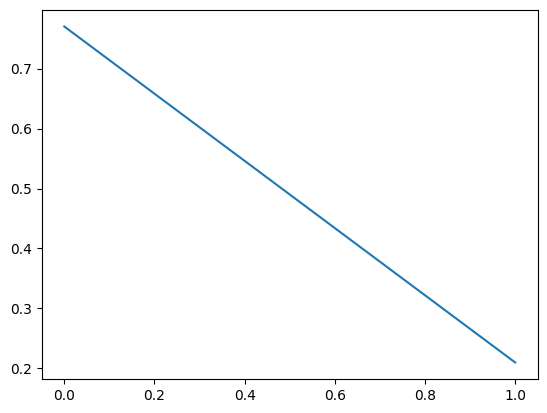

In [147]:
plt.plot(pca.explained_variance_ratio_)

In [148]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(principalComponents, target, test_size=0.2, random_state=42)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [149]:
print(train_input.shape, train_target.shape, val_input.shape, val_target.shape)

(109, 2) (109, 1) (28, 2) (28, 1)


In [150]:
train_input = train_input[:, np.newaxis, :]
val_input = val_input[:, np.newaxis, :]
test_input = test_input[:, np.newaxis, :]

In [151]:
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.LSTM(500, dropout=0.3, return_sequences=True, input_shape=(1, 2)))
model.add(keras.layers.LSTM(100, dropout=0.3))
model.add(keras.layers.Dense(300, activation='leaky_relu'))


model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_27 (LSTM)              (None, 1, 500)            1006000   
                                                                 
 lstm_28 (LSTM)              (None, 100)               240400    
                                                                 
 dense_12 (Dense)            (None, 300)               30300     
                                                                 
Total params: 1,276,700
Trainable params: 1,276,700
Non-trainable params: 0
_________________________________________________________________


In [152]:
from keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=1e-4), loss='mean_squared_error', metrics=['mae'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('stockprice_model.h5', save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=50, restore_best_weights=True)

history= model.fit(train_input, train_target, epochs=300, validation_data=(val_input, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/300
4/4 [==============================] - 6s 372ms/step - loss: 62841630720.0000 - mae: 238006.4219 - val_loss: 65694261248.0000 - val_mae: 243964.2812
Epoch 2/300
4/4 [==============================] - 0s 31ms/step - loss: 62841634816.0000 - mae: 238006.4219 - val_loss: 65694261248.0000 - val_mae: 243964.2812
Epoch 3/300
4/4 [==============================] - 0s 56ms/step - loss: 62841630720.0000 - mae: 238006.4219 - val_loss: 65694257152.0000 - val_mae: 243964.2812
Epoch 4/300
4/4 [==============================] - 0s 35ms/step - loss: 62841634816.0000 - mae: 238006.4219 - val_loss: 65694257152.0000 - val_mae: 243964.2812
Epoch 5/300
4/4 [==============================] - 0s 30ms/step - loss: 62841630720.0000 - mae: 238006.4219 - val_loss: 65694257152.0000 - val_mae: 243964.2812
Epoch 6/300
4/4 [==============================] - 0s 37ms/step - loss: 62841630720.0000 - mae: 238006.4219 - val_loss: 65694257152.0000 - val_mae: 243964.2812
Epoch 7/300
4/4 [======================

In [153]:
model.evaluate(test_input, test_target)

2/2 [==============================] - 0s 10ms/step - loss: 69604958208.0000 - mae: 243695.6875


[69604958208.0, 243695.6875]

In [154]:
data = df.copy()

In [155]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np

# 종가 데이터만 선택
close_prices = data['Close'].values.reshape(-1, 1)

# 데이터 정규화
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

# 데이터를 시퀀스로 분할하기 위한 함수 정의
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# 60일의 데이터를 기반으로 다음 날의 종가를 예측
look_back = 60
X, Y = create_dataset(scaled_data, look_back)

# 학습 및 테스트 데이터로 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

# LSTM에 입력하기 위한 데이터 형태로 변환
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

X_train.shape, X_test.shape


((88, 60, 1), (23, 60, 1))

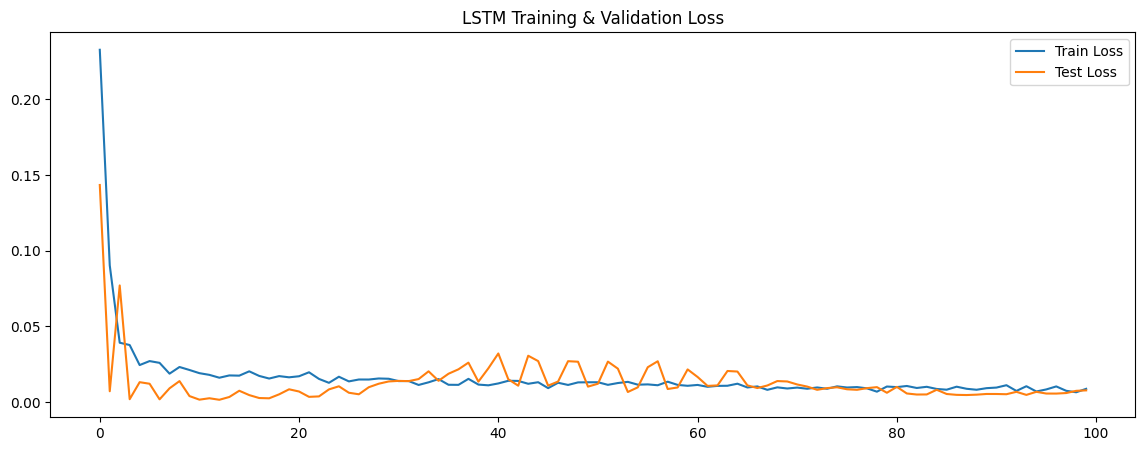

In [156]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# LSTM 모델 구축
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# 모델 학습
history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_test, Y_test), verbose=2)

# 학습 과정의 손실 그래프
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('LSTM Training & Validation Loss')
plt.legend()
plt.show()


In [157]:
# 1. 데이터 세트의 마지막 60일 데이터를 가져옴
last_60_days = scaled_data[-60:]

# 2. LSTM 입력 형식에 맞게 데이터 변환
last_60_days = np.reshape(last_60_days, (1, 60, 1))

# 3. 모델을 사용하여 예측
predicted_price = model.predict(last_60_days)

# 예측된 값을 원래의 스케일로 변환
predicted_price = scaler.inverse_transform(predicted_price)

print(f"9월 11일의 예측 종가는: {predicted_price[0][0]}")


1/1 [==============================] - 4s 4s/step
9월 11일의 예측 종가는: 292190.0
